<a href="https://colab.research.google.com/github/mtavakoliangit/ena/blob/main/LSTM_ena_garage1node.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import pandas as pd

from __future__ import print_function
import time
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.constraints import maxnorm
#from keras.optimizers import Nadam

from  keras.layers import LSTM

import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#load data from gdrive
raw_data = pd.read_csv('gdrive/My Drive/ENA_db/garage_onedevice_formatted.csv')

In [5]:
raw_data.head()

,Unnamed: 0,DateTime,setpoint_temp,setpoint_fan,reading_temp
0,0,2020-11-13 23:04:24,7.0,0.0,8.0
1,1,2020-11-13 23:05:29,7.0,0.0,8.0
2,2,2020-11-13 23:06:34,7.0,0.0,8.0
3,3,2020-11-13 23:08:43,7.0,0.0,8.0
4,4,2020-11-13 23:09:47,7.0,0.0,8.0


In [6]:
# define input sequence
raw_seq = raw_data['reading_temp']

In [7]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
#for i in range(len(X)):
#	print(X[i], y[i])

In [8]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print (X)

[[[8.]
  [8.]
  [8.]]

 [[8.]
  [8.]
  [8.]]

 [[8.]
  [8.]
  [8.]]

 ...

 [[7.]
  [7.]
  [7.]]

 [[7.]
  [7.]
  [7.]]

 [[7.]
  [7.]
  [7.]]]


In [9]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu',input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


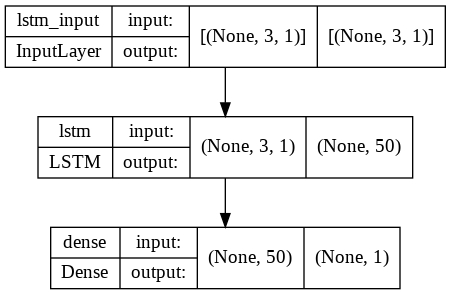

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True,)

In [ ]:
# fit model
model.fit(X, y, epochs=200, verbose=1)

In [13]:
# demonstrate prediction
#borrowing from row 423-425, 14-11-20 6:53
x_input = array([7.5, 7.5, 7])
x_input = x_input.reshape((1, n_steps, n_features))
#expectation: 7
yhat = model.predict(x_input, verbose=0)
print (yhat)

[[7.2737274]]


In [14]:
# define model
model1 = Sequential()
model1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model1.add(LSTM(40, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


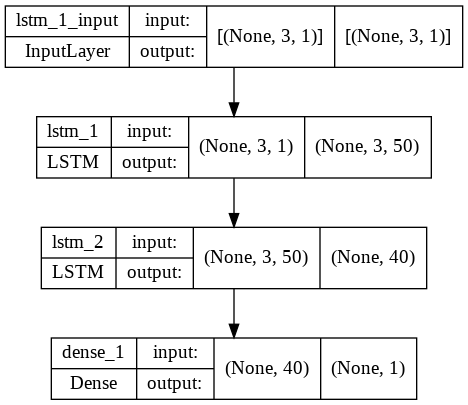

In [15]:
model.summary()
plot_model(model1, to_file='model.png',show_shapes=True, show_layer_names=True,)

In [ ]:
model1.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
#borrowing from row 473-475, 14-11-20 7:47
x_input = array([7, 6.5, 6.5])
x_input = x_input.reshape((1, n_steps, n_features))
#expectation 6.5
yhat = model1.predict(x_input, verbose=0)
print(yhat)

In [ ]:
#borrowing from row 580-582, 14-11-20 9:41
x_input = array([100, 110, 120])
x_input = x_input.reshape((1, n_steps, n_features))
#expectation 13
print (model.predict(x_input, verbose=0))
print (model1.predict(x_input, verbose=0))